<a href="https://colab.research.google.com/github/ShahdMoataz20/Predicting-Hazardous-NEOs-Nearest-Earth-Objects-/blob/main/Predicting_Hazardous_NEOs_(Nearest_Earth_Objects).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Data importing & cleaning**


In [89]:
df = pd.read_csv("/content/nearest-earth-objects(1910-2024).csv")

In [90]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [91]:
df.drop(['neo_id','name'], axis=1, inplace=True)

In [92]:
df

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...
338194,28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338171 non-null  float64
 1   estimated_diameter_min  338171 non-null  float64
 2   estimated_diameter_max  338171 non-null  float64
 3   orbiting_body           338199 non-null  object 
 4   relative_velocity       338199 non-null  float64
 5   miss_distance           338199 non-null  float64
 6   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), object(1)
memory usage: 15.8+ MB


In [94]:
df.isnull().sum()

,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [95]:
df.fillna(0,inplace=True)

In [96]:
df.isnull().sum()

,0
absolute_magnitude,0
estimated_diameter_min,0
estimated_diameter_max,0
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [97]:
df.duplicated().sum()

5

In [98]:
df.drop_duplicates(inplace=True)

In [99]:
df.duplicated().sum()

0

In [100]:
df['orbiting_body'].value_counts()

,count
orbiting_body,
Earth,338194


#**Data Preprocessing**

In [101]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["is_hazardous"] = encoder.fit_transform(df["is_hazardous"])

In [102]:
print(df["is_hazardous"].value_counts())  # Verify encoding

is_hazardous
0    295032
1     43162
Name: count, dtype: int64


In [103]:
df.drop(columns=["orbiting_body","orbiting_body_Earth"], inplace=True, errors="ignore")
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,0
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,1
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,0
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,0
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,0


In [104]:
from sklearn.preprocessing import StandardScaler
from collections import Counter

is_hazardous
0    295032
1     43162
Name: count, dtype: int64


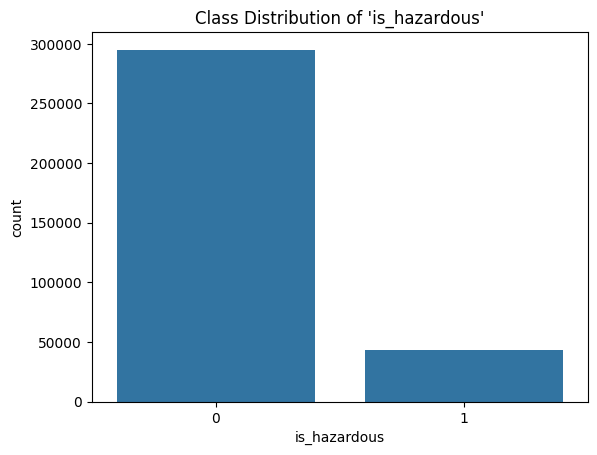

In [105]:
print(df["is_hazardous"].value_counts())
sns.countplot(x=df["is_hazardous"])
plt.title("Class Distribution of 'is_hazardous'")
plt.show()

# **EDA**

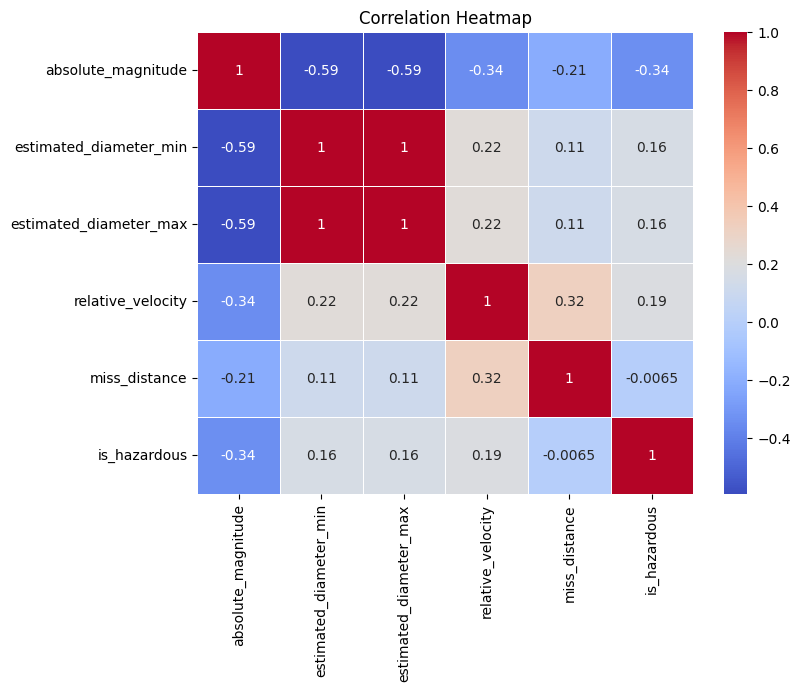

In [106]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

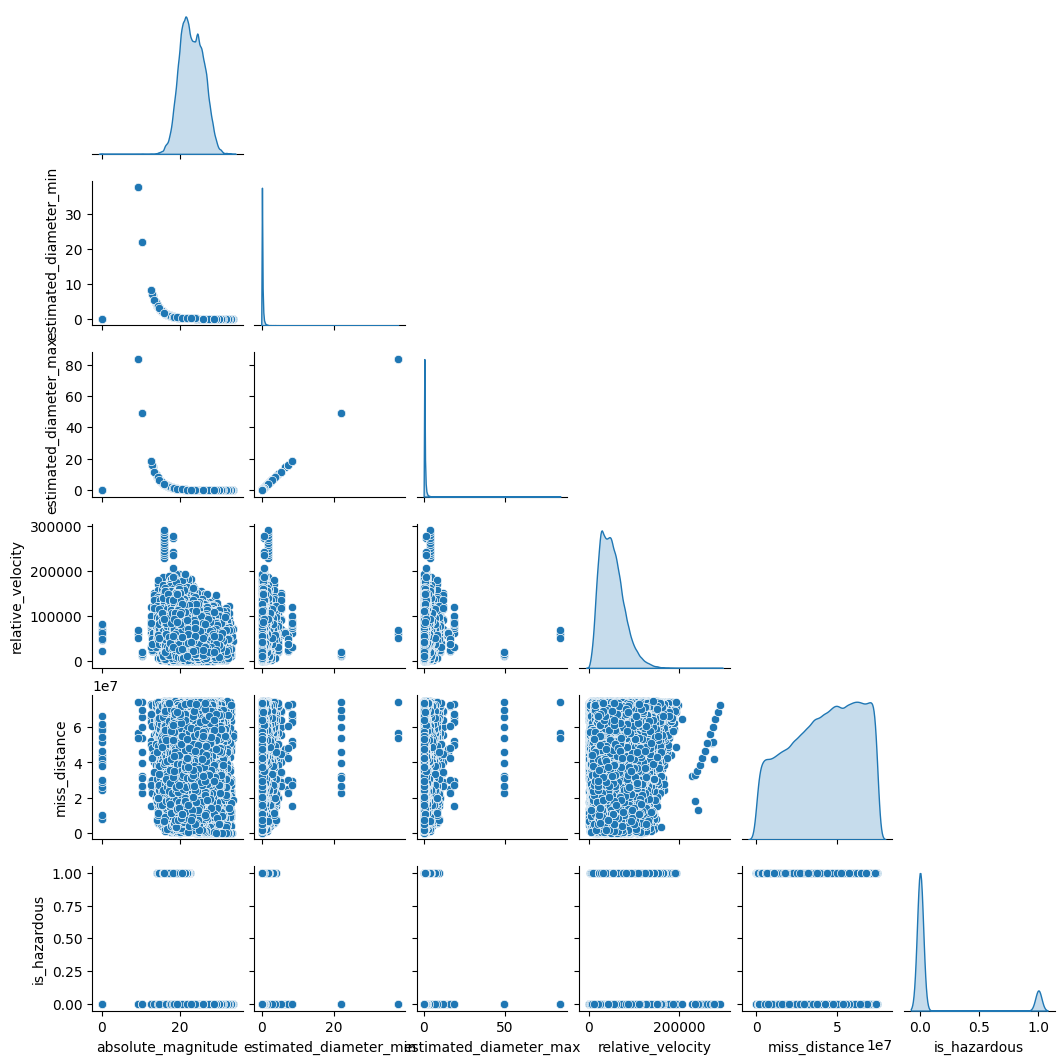

In [107]:
sns.pairplot(df, diag_kind="kde", corner=True, height=1.8)
plt.show()

# **Model Training and Evaluation:**

(118013,) (118013,)
Accuracy: 0.9514799217035411

Confusion Matrix:
 [[56175  2657]
 [ 3069 56112]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     58832
           1       0.95      0.95      0.95     59181

    accuracy                           0.95    118013
   macro avg       0.95      0.95      0.95    118013
weighted avg       0.95      0.95      0.95    118013



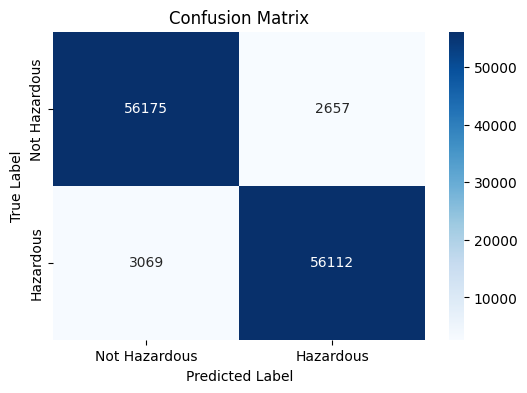

In [117]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

# Apply SMOTE before splitting
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Correct train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
#RandomForest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check consistency
print(y_test.shape, y_pred.shape)  # Should match

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Hazardous", "Hazardous"], yticklabels=["Not Hazardous", "Hazardous"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

✅ Accuracy: 0.7534558464791022

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.72      0.84     59007
           1       0.34      0.95      0.50      8632

    accuracy                           0.75     67639
   macro avg       0.66      0.84      0.67     67639
weighted avg       0.91      0.75      0.79     67639



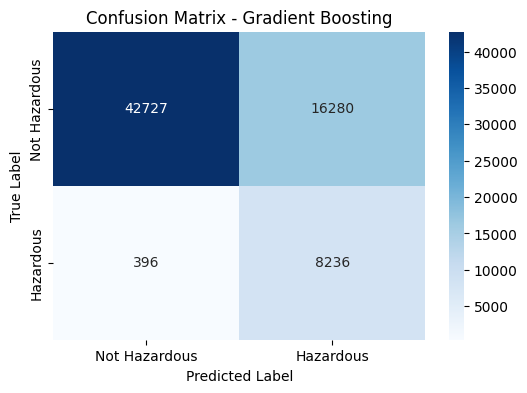

In [116]:
# GradientBoosting Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance classes
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train the Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train_resampled)

# Predict on test set
y_pred = gb_model.predict(X_test_scaled)

# Evaluate model performance
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Hazardous", "Hazardous"], yticklabels=["Not Hazardous", "Hazardous"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

In [119]:
# Ensemble Learning
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', RandomForestClassifier(n_estimators=200)),
    ('xgb', XGBClassifier(n_estimators=200))
]

stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)

In [120]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9506156101446451

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     58832
           1       0.95      0.95      0.95     59181

    accuracy                           0.95    118013
   macro avg       0.95      0.95      0.95    118013
weighted avg       0.95      0.95      0.95    118013


Confusion Matrix:
 [[55913  2919]
 [ 2909 56272]]
